In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
#importing the train data
from google.colab import drive 
drive.mount('/content/gdrive')

ImportError: No module named google.colab

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/train.csv', index_col=['datetime'], parse_dates=['datetime'])

In [5]:
data.head()

,ID,temperature,var1,pressure,windspeed,var2,electricity_consumption
datetime,,,,,,,
2013-07-01 00:00:00,0,-11.4,-17.1,1003.0,571.910,A,216.0
2013-07-01 01:00:00,1,-12.1,-19.3,996.0,575.040,A,210.0
2013-07-01 02:00:00,2,-12.9,-20.0,1000.0,578.435,A,225.0
2013-07-01 03:00:00,3,-11.4,-17.1,995.0,582.580,A,216.0
2013-07-01 04:00:00,4,-11.4,-19.3,1005.0,586.600,A,222.0


In [6]:
data.describe()

,ID,temperature,var1,pressure,windspeed,electricity_consumption
count,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000
mean,17455.500000,5.098989,-1.916233,986.450615,23.959956,298.359601
std,10122.873673,8.682860,10.424860,12.002647,48.280321,108.020555
min,0.000000,-17.100000,-32.900000,953.000000,1.075000,174.000000
25%,8717.750000,-2.900000,-10.700000,978.000000,3.155000,219.000000
50%,17435.500000,6.400000,-1.400000,986.000000,6.545000,267.000000
75%,26177.250000,12.100000,7.900000,995.000000,22.260000,342.000000
max,34895.000000,23.600000,18.600000,1024.000000,586.600000,1386.000000


In [7]:
print (data.dtypes)

ID                           int64
temperature                float64
var1                       float64
pressure                   float64
windspeed                  float64
var2                        object
electricity_consumption    float64
dtype: object


In [0]:
data['electricity_consumption'] = data['electricity_consumption'].astype('int')

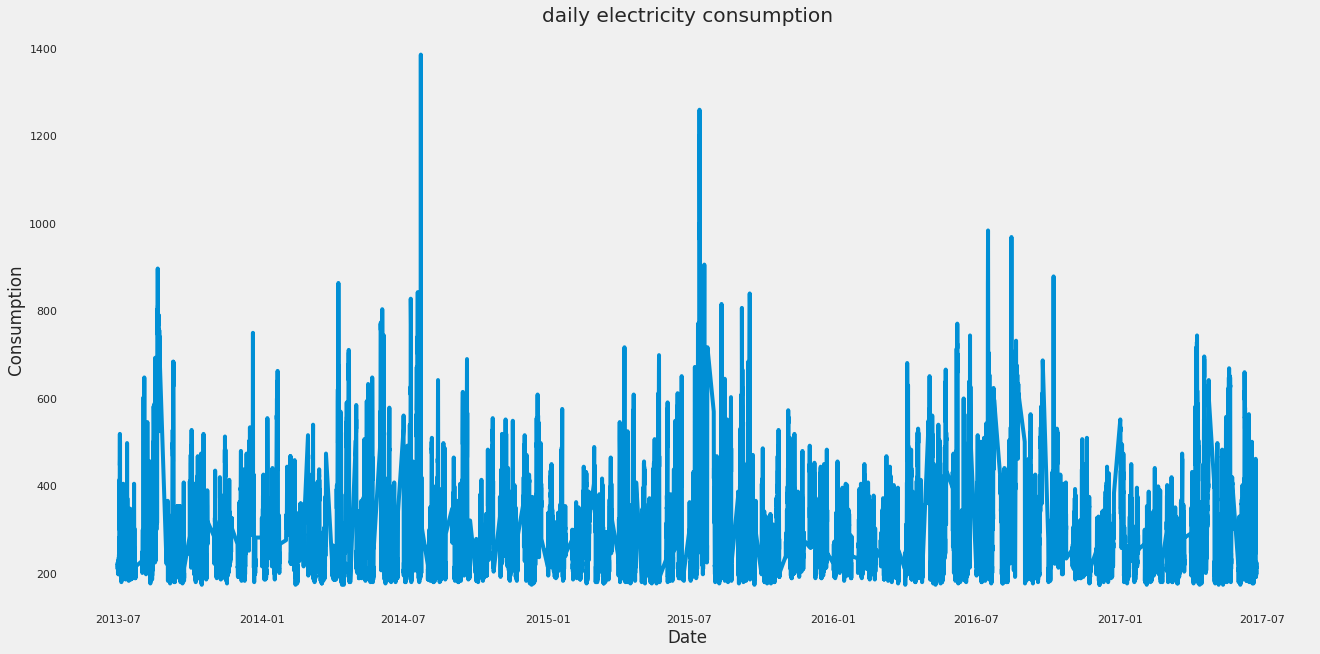

In [11]:
# Plot electricity consumption

plt.figure(figsize=(20, 10))
plt.plot(data.electricity_consumption)
plt.title('daily electricity consumption')
plt.ylabel('Consumption')
plt.xlabel('Date')
plt.grid(False)
plt.show()

In [12]:
data.index

DatetimeIndex(['2013-07-01 00:00:00', '2013-07-01 01:00:00',
               '2013-07-01 02:00:00', '2013-07-01 03:00:00',
               '2013-07-01 04:00:00', '2013-07-01 05:00:00',
               '2013-07-01 06:00:00', '2013-07-01 07:00:00',
               '2013-07-01 08:00:00', '2013-07-01 09:00:00',
               ...
               '2017-06-23 14:00:00', '2017-06-23 15:00:00',
               '2017-06-23 16:00:00', '2017-06-23 17:00:00',
               '2017-06-23 18:00:00', '2017-06-23 19:00:00',
               '2017-06-23 20:00:00', '2017-06-23 21:00:00',
               '2017-06-23 22:00:00', '2017-06-23 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=26496, freq=None)

In [0]:
y = data["electricity_consumption"].resample('MS').mean()

In [14]:
y["2013":]

datetime
2013-07-01    240.217391
2013-08-01    386.635870
2013-09-01    269.565217
2013-10-01    294.461957
2013-11-01    265.326087
2013-12-01    316.157609
2014-01-01    311.146739
2014-02-01    299.592391
2014-03-01    271.673913
2014-04-01    321.559783
2014-05-01    297.108696
2014-06-01    303.217391
2014-07-01    332.483696
2014-08-01    272.505435
2014-09-01    300.146739
2014-10-01    285.902174
2014-11-01    296.625000
2014-12-01    304.027174
2015-01-01    285.233696
2015-02-01    286.418478
2015-03-01    271.369565
2015-04-01    294.320652
2015-05-01    286.048913
2015-06-01    319.201087
2015-07-01    386.114130
2015-08-01    305.385870
2015-09-01    344.820652
2015-10-01    268.918478
2015-11-01    294.108696
2015-12-01    306.364130
2016-01-01    265.548913
2016-02-01    266.097826
2016-03-01    279.684783
2016-04-01    303.646739
2016-05-01    314.320652
2016-06-01    318.125000
2016-07-01    335.875000
2016-08-01    371.717391
2016-09-01    305.222826
2016-10-01    30

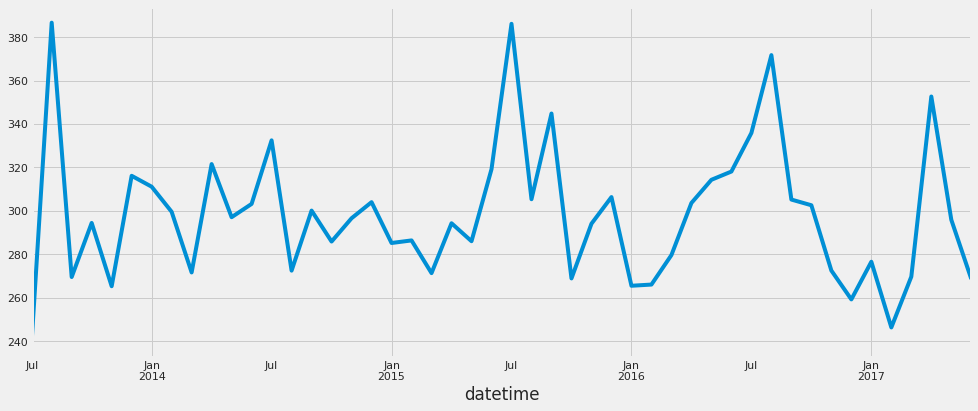

In [15]:
y.plot(figsize=(15, 6))
plt.show()

In [0]:
# this clearly shows seasonality #notincanada
# this also shows that July 2014 was a particulary a cooler summer
# now lets try to decompose the data

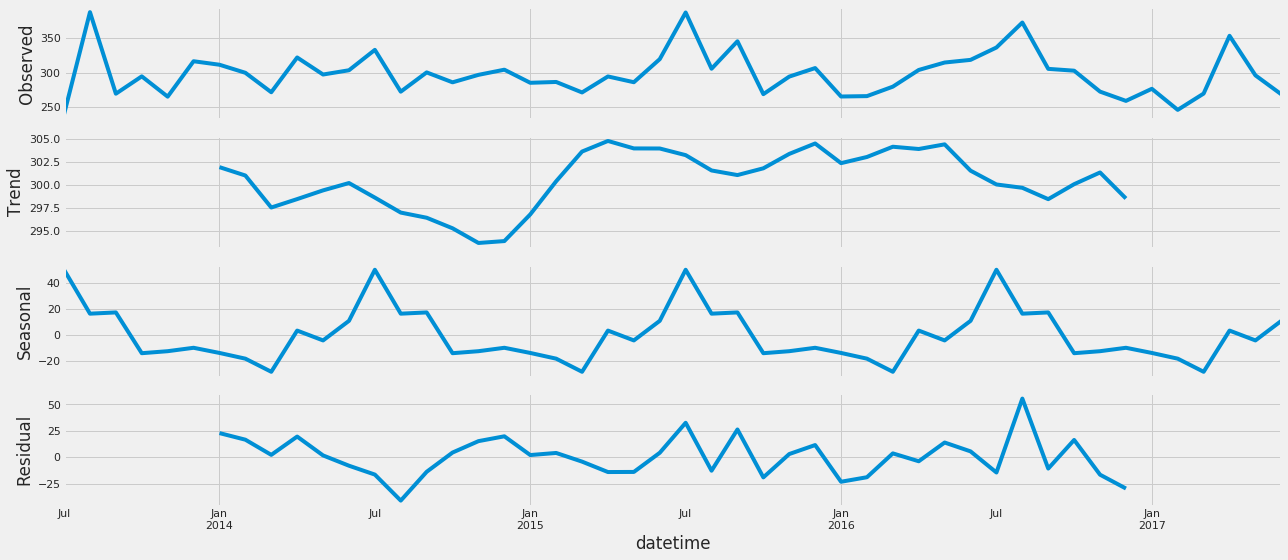

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8 
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [0]:
# Time Series Forecasting with Arima

In [21]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [22]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
                continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:671.9186326628749
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1609.9731967594412
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:350.499189536049
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:367.7095729533214
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:348.9788431389457
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:239.9240102467783
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:603.3388085688761
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2985.265687356785
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:329.7900859238624
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:364.4657692818246
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:335.4836417878291
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:241.07344364793732
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:470.2894680952858
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1202.5147809403115
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:365.0772414360664
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:356.25883267978475
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:942.9605232576539
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:248.90193691525167
ARIMA(

In [0]:
## The above output suggests that ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:364 yields the best AIC option for our dataset.

In [25]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 0, 1),
                                seasonal_order=(1, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3981      0.159     -2.507      0.012      -0.709      -0.087
ar.S.L12       0.9965      0.014     69.043      0.000       0.968       1.025
sigma2      1229.4850    303.225      4.055      0.000     635.175    1823.795


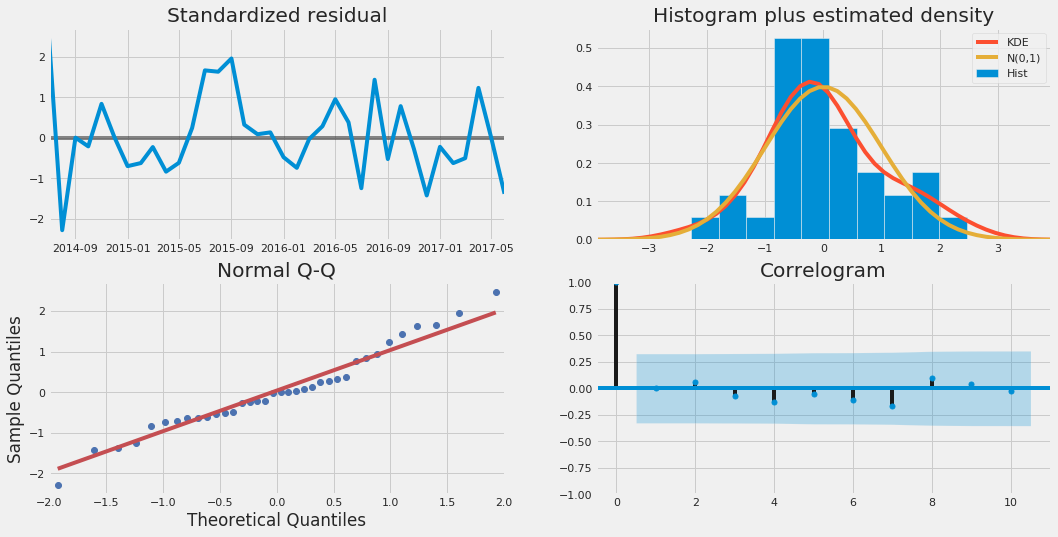

In [26]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [0]:
# it is not great but the diagnostic shows that the model residuals is almost normally distributed

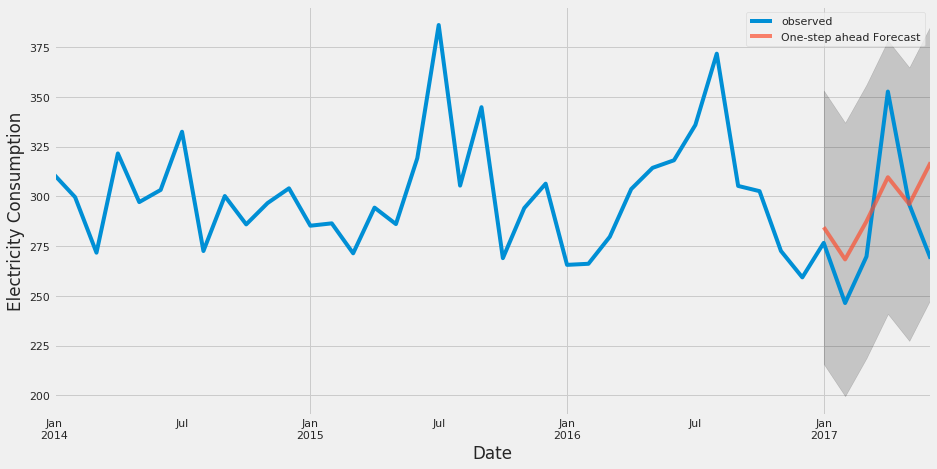

In [28]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Electricity Consumption')
plt.legend()
plt.show()

In [0]:
# our forecast is looking decent after a few tweeks to our arima algorithm

In [29]:
y_forecasted = pred.predicted_mean
y_truth = y['2013-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 841.69


In [30]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 29.01


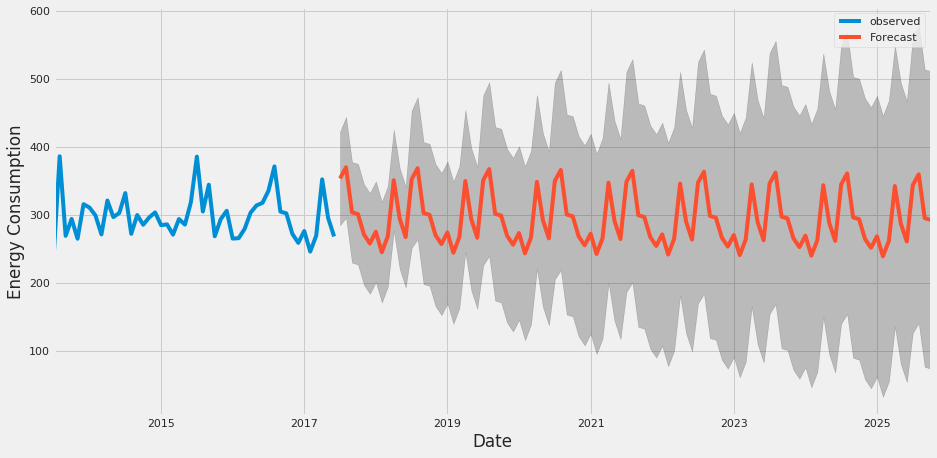

In [31]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Energy Consumption')
plt.legend()
plt.show()

In [0]:
# our model seems to capture the seasonality of our dataset, although, I am sure it could be a bit more accurate.

In [0]:
#We could introduce a secondary dataset here to compare between the two datasets

In [0]:
#checking stationarity
# https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/ 
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [0]:
#doing a bit more cleaning of my data by dropping some unecessary columns
data = data.drop(columns=['ID', 'var2'], axis=0)

In [34]:
data.head()

,temperature,var1,pressure,windspeed,electricity_consumption
datetime,,,,,
2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,216
2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,210
2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,225
2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,216
2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,222


In [37]:
coint_johansen(data,-1,1).eig

array([4.69395335e-02, 3.92945014e-02, 2.27791016e-02, 2.49211387e-03,
       6.54045183e-06])

In [40]:
# introducing our test data to train and test our Var model

test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/test.csv', index_col=['datetime'], parse_dates=['datetime'])
test.head()

,ID,temperature,var1,pressure,windspeed,var2
datetime,,,,,,
2013-07-24 00:00:00,552,-10.0,-16.4,1011.0,263.280,A
2013-07-24 01:00:00,553,-10.0,-20.7,1011.0,267.175,A
2013-07-24 02:00:00,554,-10.7,-17.1,1003.0,269.555,A
2013-07-24 03:00:00,555,-13.6,-20.7,1008.0,273.060,A
2013-07-24 04:00:00,556,-10.7,-17.1,1006.0,1.765,A


In [41]:
#dropping the object datatype since our VAR model cannot successful run with it

test = test.drop(['var2'], axis=1)
test.head()

,ID,temperature,var1,pressure,windspeed
datetime,,,,,
2013-07-24 00:00:00,552,-10.0,-16.4,1011.0,263.280
2013-07-24 01:00:00,553,-10.0,-20.7,1011.0,267.175
2013-07-24 02:00:00,554,-10.7,-17.1,1003.0,269.555
2013-07-24 03:00:00,555,-13.6,-20.7,1008.0,273.060
2013-07-24 04:00:00,556,-10.7,-17.1,1006.0,1.765


In [42]:
np.asarray(data)
np.asarray(test)

array([[ 5.52000e+02, -1.00000e+01, -1.64000e+01,  1.01100e+03,
         2.63280e+02],
       [ 5.53000e+02, -1.00000e+01, -2.07000e+01,  1.01100e+03,
         2.67175e+02],
       [ 5.54000e+02, -1.07000e+01, -1.71000e+01,  1.00300e+03,
         2.69555e+02],
       ...,
       [ 3.50610e+04, -7.10000e+00, -1.93000e+01,  1.00400e+03,
         2.44325e+02],
       [ 3.50620e+04, -6.40000e+00, -1.93000e+01,  1.00800e+03,
         2.47470e+02],
       [ 3.50630e+04, -5.00000e+00, -1.64000e+01,  1.00100e+03,
         2.50600e+02]])

In [0]:
#importing our dictionary for the VAR modeling

from statsmodels.tsa.vector_ar.var_model import VAR

In [0]:
#creating the train and validation set

train = data[:int(0.8*(len(data)))]
valid = test[int(0.8*(len(data))):]

In [0]:
#fitting the model

model = VAR(endog=train)
model_fit = model.fit()

In [0]:
# make prediction on validation

prediction = model_fit.forecast(model_fit.y, steps=len(valid))

In [0]:
#missing value treatment
cols = data.columns
for j in cols:
    for i in range(0,len(data)):
       if data[j][i] == -200:
           data[j][i] = data[j][i-1]

In [0]:
#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,13):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

In [0]:
from math import sqrt

In [69]:
#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

TypeError: ignored

In [64]:
#make final predictions
model = VAR(endog=data)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

[[  -2.10957356  -11.54588267 1000.96249218   69.51977644  213.53149044]]
